In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [43]:
data = pd.read_csv('FlightDelays.csv')
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [44]:
data['Flight Status'].replace(to_replace ="ontime", value = 1, inplace = True)
data['Flight Status'].replace(to_replace ="delayed", value = 0, inplace = True)
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,1
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,1
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,1
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,1
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,1


<AxesSubplot:>

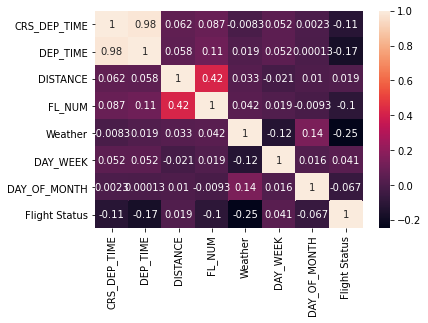

In [45]:
data.head()
corealation = data.corr()
sns.heatmap(corealation,xticklabels=corealation.columns, yticklabels=corealation.columns, annot=True)

In [5]:
data = data.drop([ 'TAIL_NUM', 'FL_NUM', 'FL_DATE', 'CRS_DEP_TIME', 'DEP_TIME'], axis=1)
data.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,OH,JFK,184,BWI,0,4,1,1
1,DH,JFK,213,DCA,0,4,1,1
2,DH,LGA,229,IAD,0,4,1,1
3,DH,LGA,229,IAD,0,4,1,1
4,DH,LGA,229,IAD,0,4,1,1


# Plot of parameters

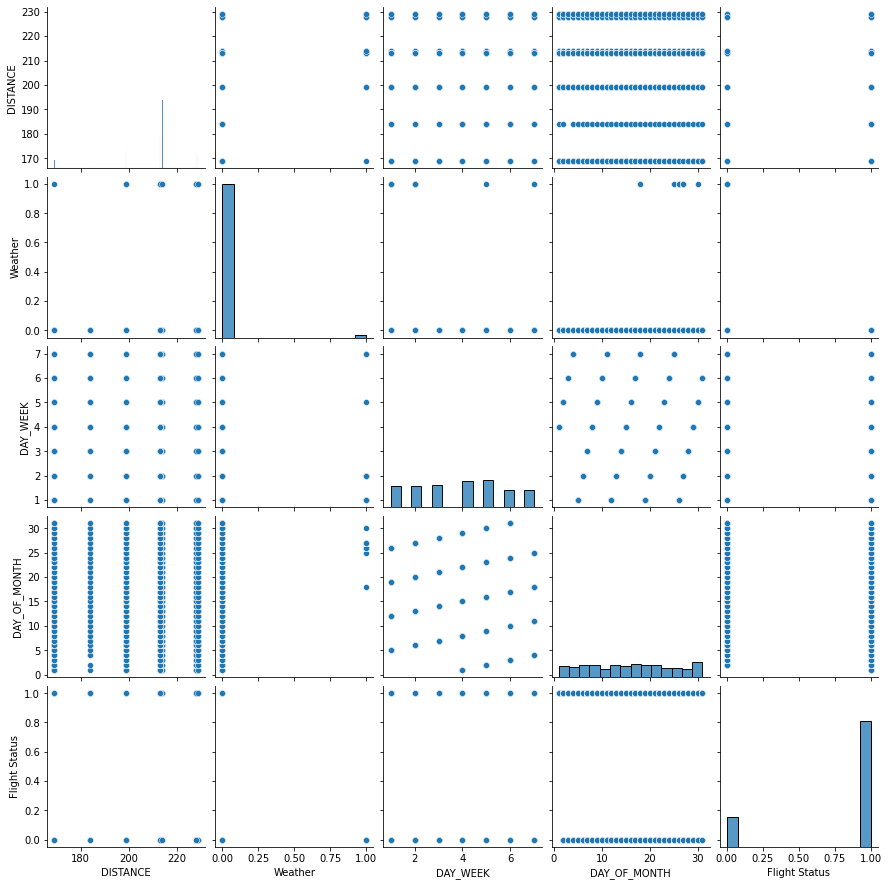

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='Flight Status', ylabel='count'>

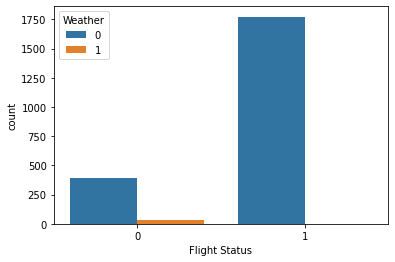

In [7]:
sns.countplot(x="Flight Status", hue="Weather" , data=data)

<AxesSubplot:xlabel='Flight Status', ylabel='count'>

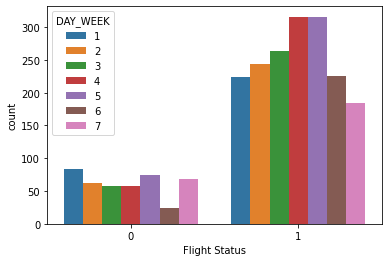

In [8]:
sns.countplot(x="Flight Status", hue="DAY_WEEK" , data=data)

<AxesSubplot:xlabel='Flight Status', ylabel='count'>

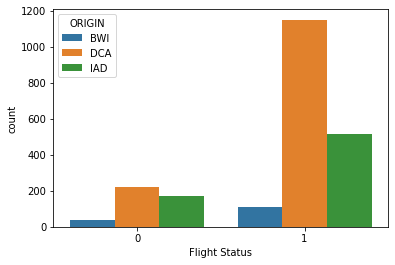

In [9]:
sns.countplot(x="Flight Status", hue="ORIGIN" , data=data)

<AxesSubplot:xlabel='Flight Status', ylabel='count'>

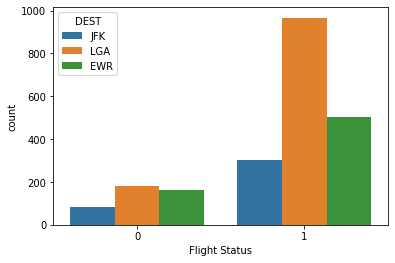

In [10]:
sns.countplot(x="Flight Status", hue="DEST" , data=data)

<AxesSubplot:ylabel='Frequency'>

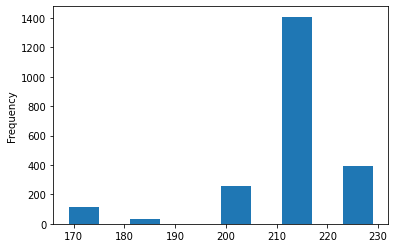

In [11]:
data['DISTANCE'].plot.hist()

<AxesSubplot:xlabel='Flight Status', ylabel='count'>

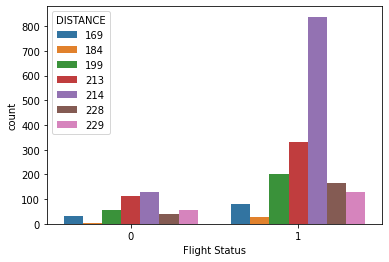

In [12]:
sns.countplot(x="Flight Status", hue="DISTANCE" , data=data)

# Preprocess data

In [13]:
data.nunique()

CARRIER           8
DEST              3
DISTANCE          7
ORIGIN            3
Weather           2
DAY_WEEK          7
DAY_OF_MONTH     31
Flight Status     2
dtype: int64

In [14]:
data.shape

(2201, 8)

In [15]:
data.describe()

,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,211.871422,0.014539,3.905498,16.024989,0.805543
std,13.316815,0.119725,1.903149,8.677390,0.395872
min,169.000000,0.000000,1.000000,1.000000,0.000000
25%,213.000000,0.000000,2.000000,8.000000,1.000000
50%,214.000000,0.000000,4.000000,16.000000,1.000000
75%,214.000000,0.000000,5.000000,23.000000,1.000000
max,229.000000,1.000000,7.000000,31.000000,1.000000


In [16]:
data.columns

Index(['CARRIER', 'DEST', 'DISTANCE', 'ORIGIN', 'Weather', 'DAY_WEEK',
       'DAY_OF_MONTH', 'Flight Status'],
      dtype='object')

In [17]:
data.isnull().sum()

CARRIER          0
DEST             0
DISTANCE         0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
Flight Status    0
dtype: int64

In [18]:
data.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,OH,JFK,184,BWI,0,4,1,1
1,DH,JFK,213,DCA,0,4,1,1
2,DH,LGA,229,IAD,0,4,1,1
3,DH,LGA,229,IAD,0,4,1,1
4,DH,LGA,229,IAD,0,4,1,1


<AxesSubplot:>

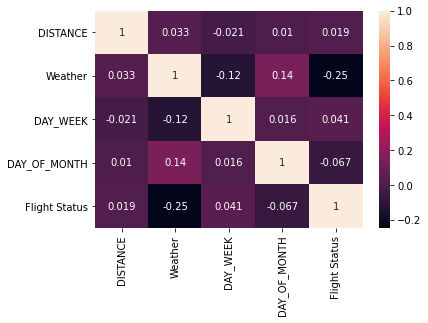

In [19]:
corealation = data.corr()
sns.heatmap(corealation,xticklabels=corealation.columns, yticklabels=corealation.columns, annot=True)

In [20]:
Weather = pd.get_dummies(data['Weather'], prefix='weather')
Weather.head()

,weather_0,weather_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
DAY_WEEK = pd.get_dummies(data['DAY_WEEK'], prefix='day')
DAY_WEEK.head()

,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [22]:
ORIGIN = pd.get_dummies(data['ORIGIN'], prefix='origin')
ORIGIN.head()

,origin_BWI,origin_DCA,origin_IAD
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
DEST = pd.get_dummies(data['DEST'], prefix='dest')
DEST.head()

,dest_EWR,dest_JFK,dest_LGA
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
DISTANCE = pd.get_dummies(data['DISTANCE'], prefix='distance')
DISTANCE.head()

,distance_169,distance_184,distance_199,distance_213,distance_214,distance_228,distance_229
0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [25]:
CARRIER = pd.get_dummies(data['CARRIER'], prefix='carrier')
CARRIER.head()

,carrier_CO,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US
0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [26]:
final = pd.concat([data, Weather, DAY_WEEK, ORIGIN, DEST, DISTANCE, CARRIER], axis=1)
final.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,weather_0,weather_1,...,distance_228,distance_229,carrier_CO,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US
0,OH,JFK,184,BWI,0,4,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,DH,JFK,213,DCA,0,4,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,DH,LGA,229,IAD,0,4,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
3,DH,LGA,229,IAD,0,4,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
4,DH,LGA,229,IAD,0,4,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0


In [27]:
final.drop(['Weather', 'DAY_WEEK', 'ORIGIN', 'DEST', 'DISTANCE', 'CARRIER'], axis=1, inplace=True)
final.head()

,DAY_OF_MONTH,Flight Status,weather_0,weather_1,day_1,day_2,day_3,day_4,day_5,day_6,...,distance_228,distance_229,carrier_CO,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US
0,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [28]:
final.tail()

,DAY_OF_MONTH,Flight Status,weather_0,weather_1,day_1,day_2,day_3,day_4,day_5,day_6,...,distance_228,distance_229,carrier_CO,carrier_DH,carrier_DL,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,carrier_US
2196,31,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2197,31,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2198,31,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2199,31,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2200,31,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Logistic Regression for new model

In [29]:
X= final.drop("Flight Status", axis=1)
y= final["Flight Status"]

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.6, random_state=1)


In [48]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.09      0.16       265\n           1       0.81      1.00      0.90      1056\n\n    accuracy                           0.81      1321\n   macro avg       0.84      0.54      0.53      1321\nweighted avg       0.82      0.81      0.75      1321\n'

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  24,  241],
       [   4, 1052]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8145344436033308